In [2]:
import pandas as pd
import missingno as msno
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
acquisitions = pd.read_csv('data/acquisitions.csv')
additions = pd.read_csv('data/additions.csv')
analysis = pd.read_csv('data/analysis.csv')
companies = pd.read_csv('data/companies.csv')
investments = pd.read_csv('data/investments.csv')
rounds = pd.read_csv('data/rounds.csv')

In [9]:
print(acquisitions.columns)
print(companies.columns)
print(investments.columns)
print(investments.columns)
print(rounds.columns)

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_market', 'company_country_code', 'company_state_code',
       'company_region', 'company_city', 'acquirer_permalink', 'acquirer_name',
       'acquirer_category_list', 'acquirer_market', 'acquirer_country_code',
       'acquirer_state_code', 'acquirer_region', 'acquirer_city',
       'acquired_at', 'acquired_month', 'acquired_quarter', 'acquired_year',
       'price_amount', 'price_currency_code'],
      dtype='object')
Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at'],
      dtype='object')
Index(['company_permalink', 'company_name', 'company_category_list',
       'company_market', 'company_country_code', 'company_state_code',
       'company_region', 'c

In [1]:
## Useful code for tarfiles

# products = []
# tar = tarfile.open("data/product.tar.gz")
# for member in tar.getmembers():
#      f = tar.extractfile(member)
#      if f is not None:
#          products.append(f.read())

# products[0] == b"S''\np0\n."

# product_list = []

# for byt in products:
#     if byt != b"S''\np0\n.":
#         try:
#             product_list.append(flatten(json.loads((pickle.loads(byt)))))
#         except:
#             print(byt)

# product_df = pd.DataFrame(product_list)
# msno.matrix(product_df)

In [23]:
companies.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26


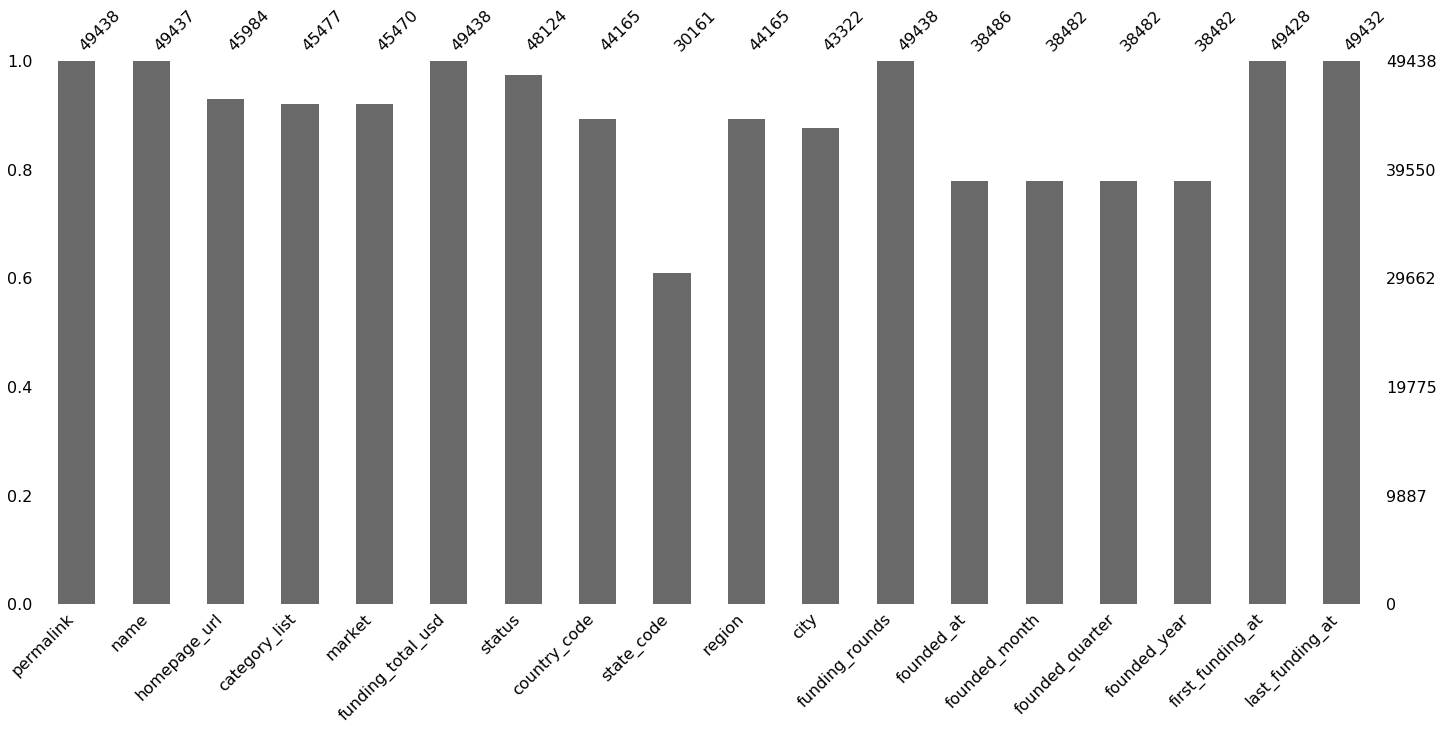

In [21]:
msno.bar(companies)

In [39]:
companies = companies[['permalink','name','category_list','funding_total_usd','status','country_code','region','city','funding_rounds','founded_at','first_funding_at','last_funding_at']]

In [40]:
companies.head(20)

,permalink,name,category_list,funding_total_usd,status,country_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,1750000,acquired,USA,New York City,New York,1,2012-06-01,2012-06-30,2012-06-30
1,/organization/tv-communications,&TV Communications,|Games|,4000000,operating,USA,Los Angeles,Los Angeles,2,NaN,2010-06-04,2010-09-23
2,/organization/rock-your-paper,'Rock' Your Paper,|Publishing|Education|,40000,operating,EST,Tallinn,Tallinn,1,2012-10-26,2012-08-09,2012-08-09
3,/organization/in-touch-network,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,1500000,operating,GBR,London,London,1,2011-04-01,2011-04-01,2011-04-01
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,|Tourism|Entertainment|Games|,60000,operating,USA,Dallas,Fort Worth,2,2014-01-01,2014-08-17,2014-09-26
5,/organization/club-domains,.Club Domains,|Software|,7000000,NaN,USA,Ft. Lauderdale,Oakland Park,1,2011-10-10,2013-05-31,2013-05-31
6,/organization/fox-networks,.Fox Networks,|Advertising|,4912393,closed,ARG,Buenos Aires,Buenos Aires,1,NaN,2007-01-16,2007-01-16
7,/organization/0-6-com,0-6.com,|Curated Web|,2000000,operating,NaN,NaN,NaN,1,2007-01-01,2008-03-19,2008-03-19
8,/organization/004-technologies,004 Technologies,|Software|,0,operating,USA,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
9,/organization/01games-technology,01Games Technology,|Games|,41250,operating,HKG,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [28]:
companies.dropna().shape

(32764, 13)

In [36]:
rounds.head()

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/waywire,#waywire,|Entertainment|Politics|Social Media|News|,News,USA,NY,New York City,New York,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,2012-06,2012-Q2,2012.0,1750000.0
1,/organization/tv-communications,&TV Communications,|Games|,Games,USA,CA,Los Angeles,Los Angeles,/funding-round/59a3669a64e39360c2b939300bcda162,venture,NaN,2010-09-23,2010-09,2010-Q3,2010.0,3000000.0
2,/organization/tv-communications,&TV Communications,|Games|,Games,USA,CA,Los Angeles,Los Angeles,/funding-round/86d22afc65107b6941e6c43c671ecbb8,venture,NaN,2010-06-04,2010-06,2010-Q2,2010.0,1000000.0
3,/organization/rock-your-paper,'Rock' Your Paper,|Publishing|Education|,Publishing,EST,NaN,Tallinn,Tallinn,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,NaN,2012-08-09,2012-08,2012-Q3,2012.0,40000.0
4,/organization/in-touch-network,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,GBR,NaN,London,London,/funding-round/33c3f135f05d7b734b8d7b7c8ae82647,seed,NaN,2011-04-01,2011-04,2011-Q2,2011.0,1500000.0


In [38]:
companies[companies['status']=='acquired'].shape

(3692, 13)

In [43]:
investments['investor_name'].value_counts()

Sequoia Capital                                         776
Start-Up Chile                                          702
500 Startups                                            694
Intel Capital                                           674
Y Combinator                                            625
New Enterprise Associates                               619
Accel Partners                                          592
SV Angel                                                575
Kleiner Perkins Caufield & Byers                        562
Draper Fisher Jurvetson (DFJ)                           504
First Round                                             423
Techstars                                               376
Index Ventures                                          374
Greylock Partners                                       371
Bessemer Venture Partners                               345
Lightspeed Venture Partners                             338
Wayra                                   

In [44]:
investments[investments['investor_name'] == "Andreessen Horowitz"]

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_list,investor_market,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
31180,/organization/apptio,Apptio,|Corporate IT|SaaS|Enterprise Software|,SaaS,USA,WA,Seattle,Bellevue,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/36955f18bd06fbfd1b90223507e6cae3,venture,B,2009-08-18,2009-08,2009-Q3,2009,14000000.0
31373,/organization/rockmelt,Rockmelt,|Facebook Applications|Browser Extensions|Soci...,Browser Extensions,USA,CA,SF Bay Area,Mountain View,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/b2d8f9f1de0a605eb08102aba4c23393,venture,A,2009-09-01,2009-09,2009-Q3,2009,8200000.0
32267,/organization/good-data,GoodData,|Analytics|Collaboration|Business Intelligence...,Collaboration,USA,CA,SF Bay Area,San Francisco,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/f6938450c1490dc1fe26f9fa8c854358,seed,NaN,2009-10-14,2009-10,2009-Q4,2009,2500000.0
32483,/organization/snaplogic,SnapLogic,|Cloud Data Services|SaaS|Cloud Computing|Inte...,Cloud Data Services,USA,CA,SF Bay Area,San Mateo,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/6ee1f492afb0ff769593d950857b86fd,venture,A,2009-10-29,2009-10,2009-Q4,2009,2300000.0
32731,/organization/zynga,Zynga,|Technology|Facebook Applications|Networking|G...,Technology,USA,CA,SF Bay Area,San Francisco,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/1bc4f7b3a778e5abfbd7131f595f5011,venture,B,2009-11-04,2009-11,2009-Q4,2009,15187000.0
33062,/organization/skype,Skype,|Messaging|VoIP|Mobile|Software|,Mobile,LUX,NaN,Esch-sur-alzette,Esch-sur-alzette,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/5bebc0cf850b2f424574fd7bc65ffcbc,debt_financing,NaN,2009-11-19,2009-11,2009-Q4,2009,50000000.0
33138,/organization/asana,Asana,|Collaboration|Task Management|Software|,Collaboration,USA,CA,SF Bay Area,San Francisco,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/38c6f30578c0180e63e3aa08b013fe85,venture,A,2009-11-24,2009-11,2009-Q4,2009,9000000.0
33964,/organization/kno,Kno,|Software|,Software,USA,CA,SF Bay Area,Santa Clara,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/486f2f0ceae5d3c6da5d21bc5c0f789f,venture,A,2009-12-23,2009-12,2009-Q4,2009,7499999.0
34088,/organization/top-prospect,Top Prospect,|Social Media|Recruiting|,Social Media,USA,CA,SF Bay Area,San Francisco,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/c19082a27e3e20c60110f3f7067eb71f,seed,NaN,2010-01-01,2010-01,2010-Q1,2010,NaN
35375,/organization/factual,Factual,|Databases|Nonprofits|,Databases,USA,CA,Los Angeles,Los Angeles,/organization/andreessen-horowitz,Andreessen Horowitz,|Finance|Venture Capital|,Venture Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/000433319b35507f990e72e376cdf7b8,seed,NaN,2010-02-03,2010-02,2010-Q1,2010,1000000.0
